# Problem 1: Adventure Works

## Challenge 1: Data Exploration and Visualisation

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [8]:
AW_data.columns
AW_data.shape
AW_data.isnull().sum()
AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


In [11]:
print("No of total entries are %d" %(AW_data.CustomerID.count()))
print("No of unique entries are %d" %(AW_data.CustomerID.unique().shape[0]))
NoduplicateIDs= AW_data.CustomerID.count()-AW_data.CustomerID.unique().shape[0]
print(NoduplicateIDs)
print(" ")
print(" ")

AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print("No of total entries are %d" %(AW_data.CustomerID.count()))
print("No of unique entries are %d" %(AW_data.CustomerID.unique().shape[0]))
NoduplicateIDs= AW_data.CustomerID.count()-AW_data.CustomerID.unique().shape[0]
print(NoduplicateIDs)

print(" ")
print("Now the duplicate entries are omitted")
print(" ")
print(" ")


AW_data.dtypes

AW_data.describe()

No of total entries are 16404
No of unique entries are 16404
0
 
 
No of total entries are 16404
No of unique entries are 16404
0
 
Now the duplicate entries are omitted
 
 


,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [10]:
print(" ")
print('')
imp_cols=['YearlyIncome', 'AveMonthSpend']
def count_unique(data, cols):
    for col in cols:
        print(data[col].value_counts())
    print(" ")
    print(" ")
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)
print(" ")
print(" ")

 

United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64
M    8290
F    8114
Name: Gender, dtype: int64
M    8852
S    7552
Name: MaritalStatus, dtype: int64
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64
0    9924
1    2180
2    1455
3    1057
4     943
5     845
Name: NumberChildrenAtHome, dtype: int64
0    4244
2    3166
1    3054
4    2250
3    1977
5    1713
Name: TotalChildren, dtype: int64
 
 
 
 


In [13]:
counts = AW_data.groupby(["Occupation"], as_index = False)['NumberCarsOwned'].median()
print(counts)

       Occupation  NumberCarsOwned
0        Clerical                1
1      Management                2
2          Manual                1
3    Professional                2
4  Skilled Manual                1


       Occupation  NumberCarsOwned
0        Clerical                1
1      Management                2
2          Manual                1
3    Professional                2
4  Skilled Manual                1


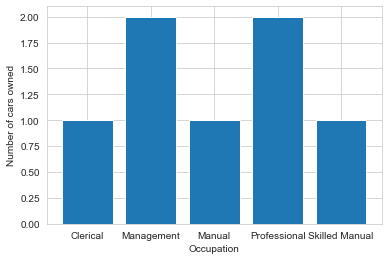

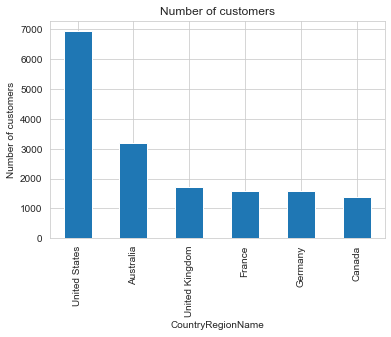

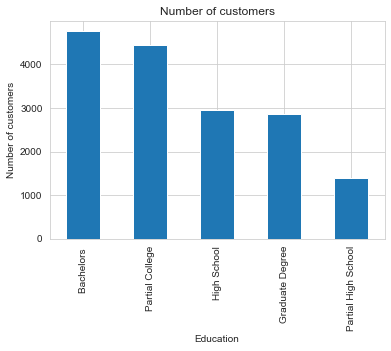

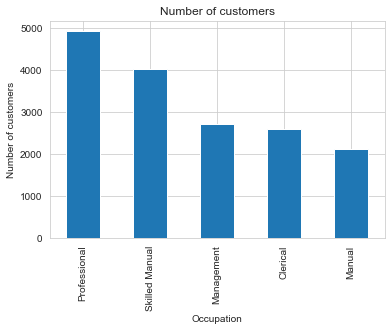

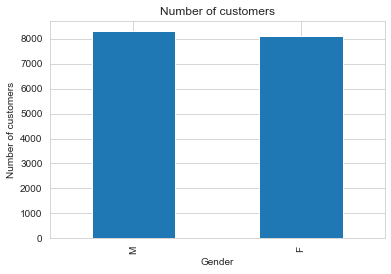

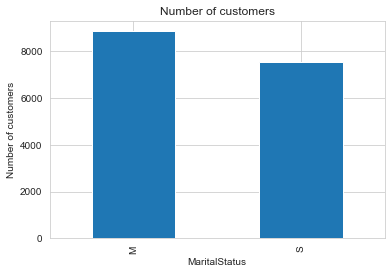

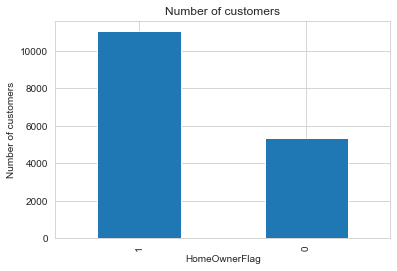

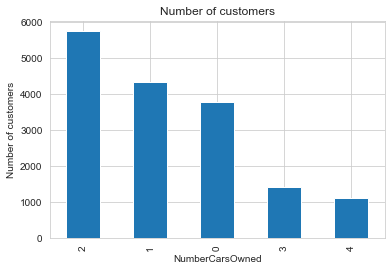

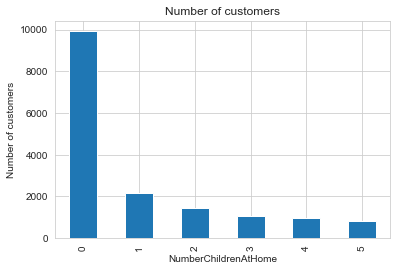

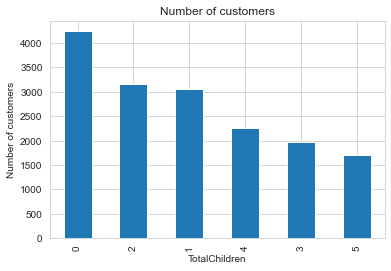

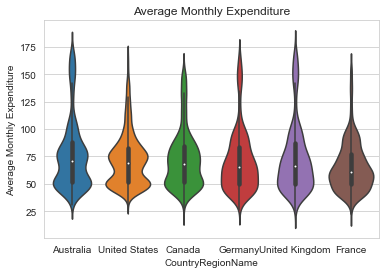

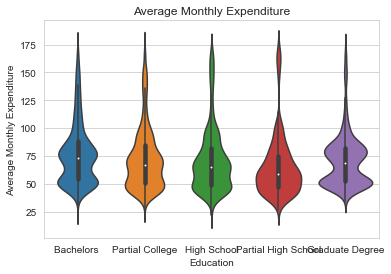

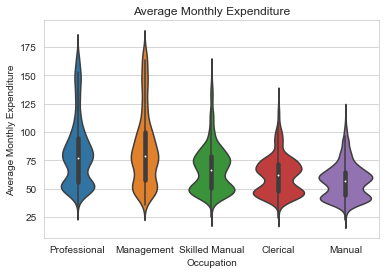

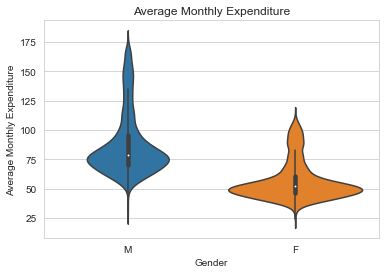

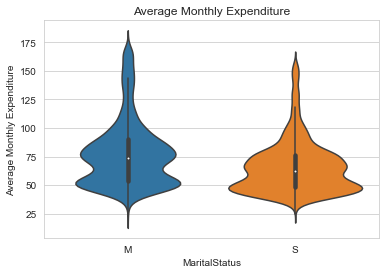

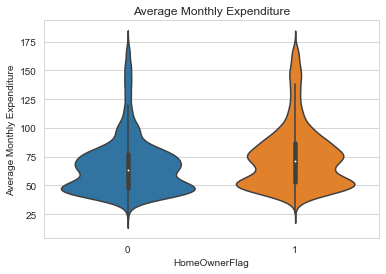

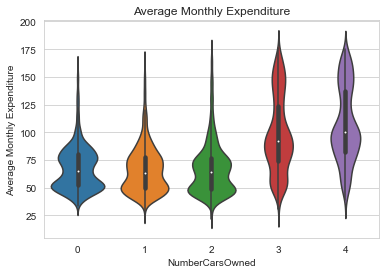

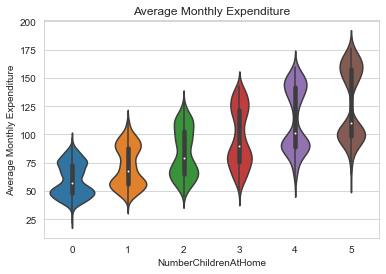

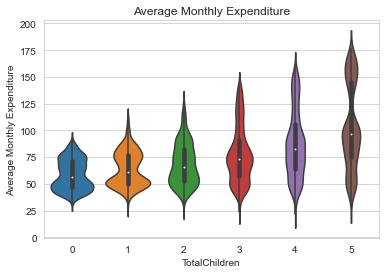

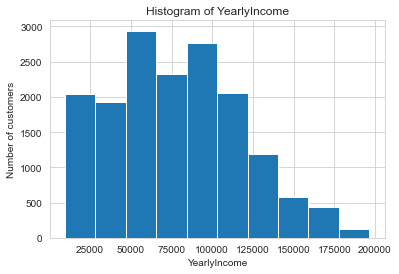

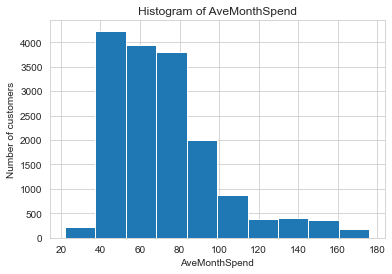

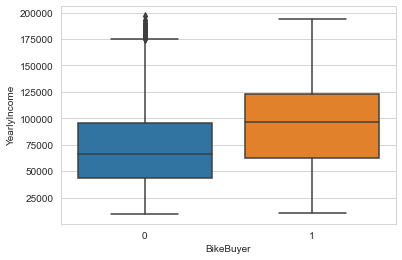

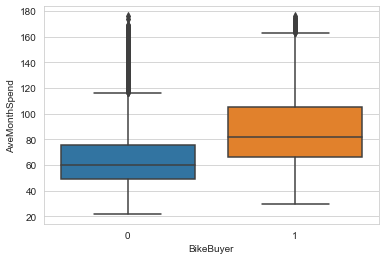

In [12]:
temp = np.array([counts['Occupation'],counts['NumberCarsOwned']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('Number of cars owned')
plt.show()

AW_data.NumberCarsOwned.unique()

def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure() 
        ax = fig.gca() 
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax)
        plt.title("Number of customers")
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.violinplot(x = col, y = col_y, data=data)
        plt.ylabel("Average Monthly Expenditure")
        plt.title("Average Monthly Expenditure")
        plt.show()
plot_violin(AW_data, cat_cols)



def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure()
        ax = fig.gca()
        data[col].plot.hist(ax = ax, bins = bins) 
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_histogram(AW_data, imp_cols)

def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

plot_box(AW_data, imp_cols)